## Modelling

It is now time to actually build our first model. The inital idea is we will fit both a linear and non linear model to both time series.

To begin with the linear model will use any seasonality we found from the EDA as well as the lags, the non linear model will only have access to the lags. 

We will use our helper functions from jfk_taxis that you can see in src/jfk_taxis

In [1]:
import pickle
import pandas as pd
from jfk_taxis import run_forecasts, preprocess, fit_linear, fit_non_linear

In [2]:
# First reload the significant lags
with open("sig_lags_daily.pkl", "rb") as f:
    daily_lags = pickle.load(f)

with open("sig_lags_hourly.pkl", "rb") as f:
    hourly_lags = pickle.load(f)

In [3]:
# Get both the full daily and hourly time series
dir_path = "../data/processed/"
df_daily = pd.read_csv(f"{dir_path}ts_daily2011-2025.csv")
df_hourly = pd.read_csv(f"{dir_path}ts_hour2011-2025.csv")

# Convert dates to datetime objects
df_daily["pickup_date"] = pd.to_datetime(df_daily["pickup_date"])
df_hourly["dt"] = pd.to_datetime(df_hourly["dt"])


In [4]:
# To pass the time series through our helper functions they need to be a pandas series indexed by a datetime object:
ts_hourly = df_hourly["trips"]
ts_hourly.index = df_hourly["dt"]

ts_daily = df_daily["trips"]
ts_daily.index = df_daily["pickup_date"]

In [5]:
# We now need to split into test and train data, we will train on the pre 2024 data and test on 2024 onwards, approx a 90:10 split
ts_daily_train = ts_daily[:"2023-12-31"]
ts_daily_test = ts_daily["2024-01-01":]

ts_hourly_train = ts_hourly[:"2023-12-31"]
ts_hourly_test = ts_hourly["2024-01-01":]

In [6]:
ts_hourly_test

dt
2024-01-01 00:00:00    150
2024-01-01 01:00:00     68
2024-01-01 02:00:00     21
2024-01-01 03:00:00     18
2024-01-01 04:00:00     26
                      ... 
2025-06-30 19:00:00    355
2025-06-30 20:00:00    395
2025-06-30 21:00:00    335
2025-06-30 22:00:00    337
2025-06-30 23:00:00    400
Name: trips, Length: 13119, dtype: int64

In [7]:
ts_hourly_train

dt
2011-01-01 00:00:00     82
2011-01-01 01:00:00     72
2011-01-01 02:00:00     15
2011-01-01 03:00:00     12
2011-01-01 04:00:00     11
                      ... 
2023-12-31 19:00:00    426
2023-12-31 20:00:00    317
2023-12-31 21:00:00    371
2023-12-31 22:00:00    313
2023-12-31 23:00:00    305
Name: trips, Length: 112870, dtype: int64

In [8]:
ts_daily_train

pickup_date
2011-01-01    2539
2011-01-02    3438
2011-01-03    8304
2011-01-04    7369
2011-01-05    6155
              ... 
2023-12-27    6027
2023-12-28    6014
2023-12-29    5755
2023-12-30    5733
2023-12-31    5296
Name: trips, Length: 4748, dtype: int64

In [9]:
# Create models and forecasts for daily ts

# 181 days in 2025 in the data, meaning 546 is the max number of steps we can forecast

# Steps for the forecast
steps = [1, 2, 3, 7, 14, 28, 30, 60, 180, 365, 500, 546]

# Fourier features (yearly and weekly)
fourier_features = ["YE", "W"]

# Create non linear model
(X_non_linear, y_non_linear, dp_non_linear) = preprocess(daily_lags, False, 0, fourier_features, ts_daily_train)
non_linear_model = fit_non_linear(X_non_linear, y_non_linear)

non_linear_models = {
    "base_non_linear": (non_linear_model, dp_non_linear, None)
}


# Create linear model
linear_models = {}

for i in [1, 2, 3, 4, 5]:
    (X,y, dp_linear) = preprocess(daily_lags, True, i, fourier_features, ts_daily_train)
    linear_models[f"linear_order{i}"] = (fit_linear(X,y), dp_linear, None)




MAE Linear: 324.40 for step = 1, model = linear_order1
MAE Linear: 344.90 for step = 1, model = linear_order2
MAE Linear: 378.40 for step = 1, model = linear_order3
MAE Linear: 294.78 for step = 1, model = linear_order4
MAE Linear: 294.78 for step = 1, model = linear_order5
MAE Non Linear: 225.98 for step = 1, model = base_non_linear
Naive MAE: MAE = 342.00



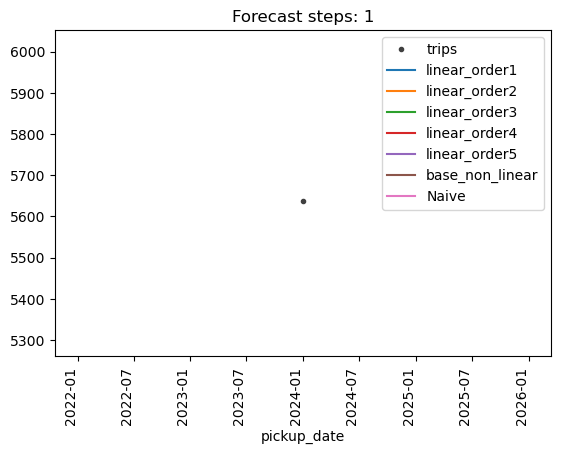

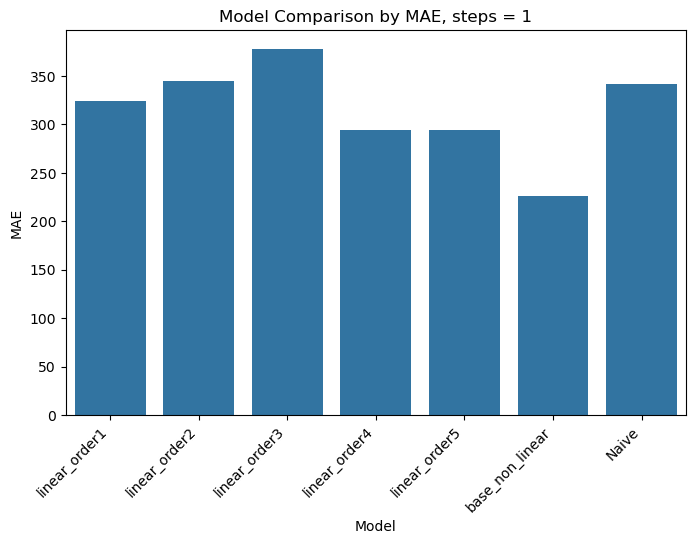

MAE Linear: 524.57 for step = 2, model = linear_order1
MAE Linear: 517.60 for step = 2, model = linear_order2
MAE Linear: 508.16 for step = 2, model = linear_order3
MAE Linear: 484.41 for step = 2, model = linear_order4
MAE Linear: 484.41 for step = 2, model = linear_order5
MAE Non Linear: 433.53 for step = 2, model = base_non_linear
Naive MAE: MAE = 664.00



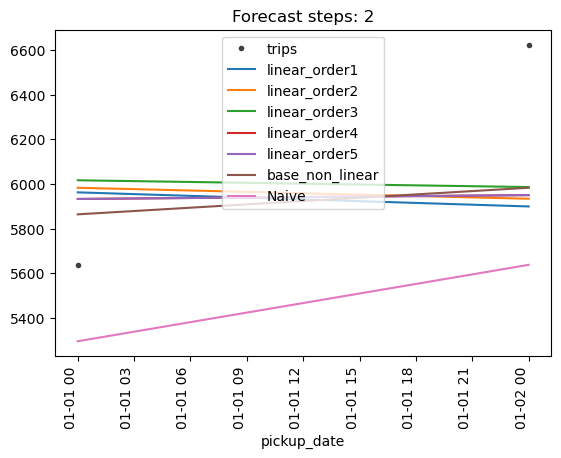

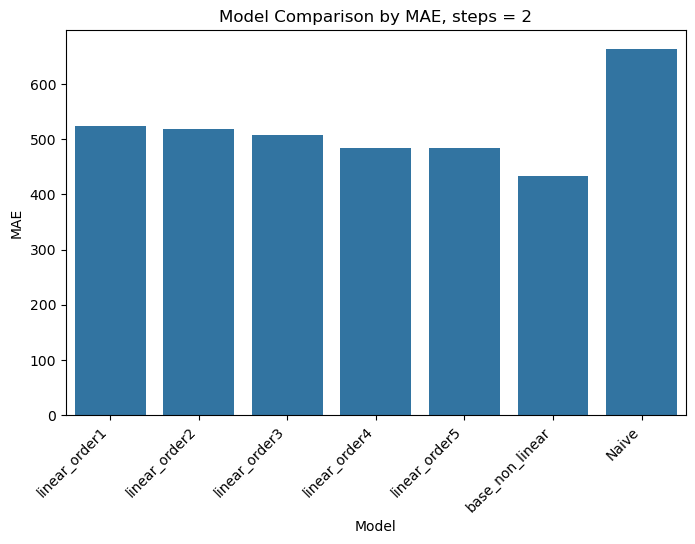

MAE Linear: 545.60 for step = 3, model = linear_order1
MAE Linear: 527.92 for step = 3, model = linear_order2
MAE Linear: 501.54 for step = 3, model = linear_order3
MAE Linear: 491.10 for step = 3, model = linear_order4
MAE Linear: 491.10 for step = 3, model = linear_order5
MAE Non Linear: 352.10 for step = 3, model = base_non_linear
Naive MAE: MAE = 604.33



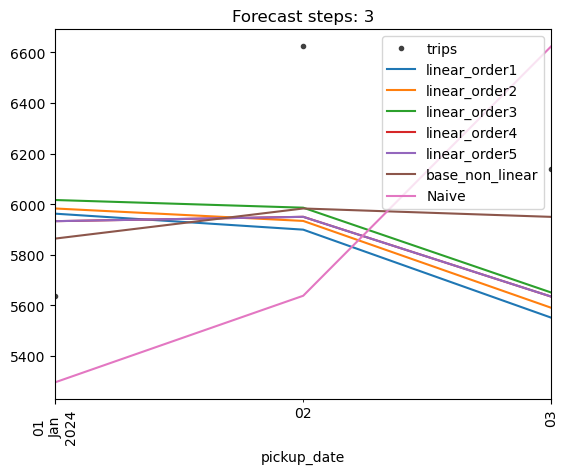

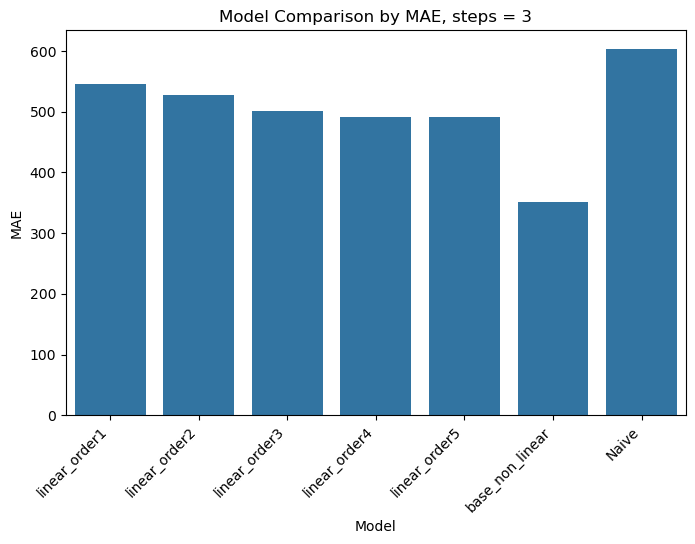

MAE Linear: 439.14 for step = 7, model = linear_order1
MAE Linear: 446.66 for step = 7, model = linear_order2
MAE Linear: 459.96 for step = 7, model = linear_order3
MAE Linear: 455.13 for step = 7, model = linear_order4
MAE Linear: 455.13 for step = 7, model = linear_order5
MAE Non Linear: 361.43 for step = 7, model = base_non_linear
Naive MAE: MAE = 592.71



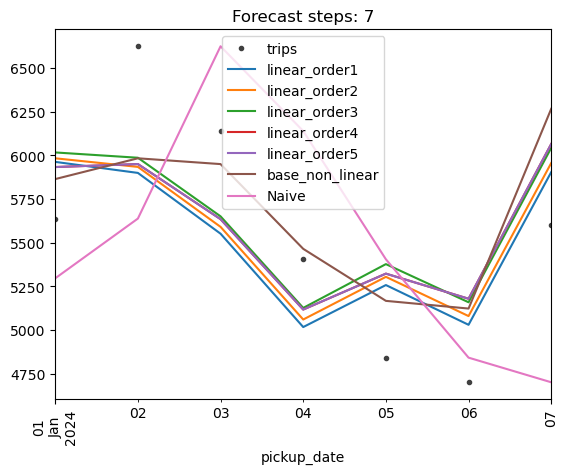

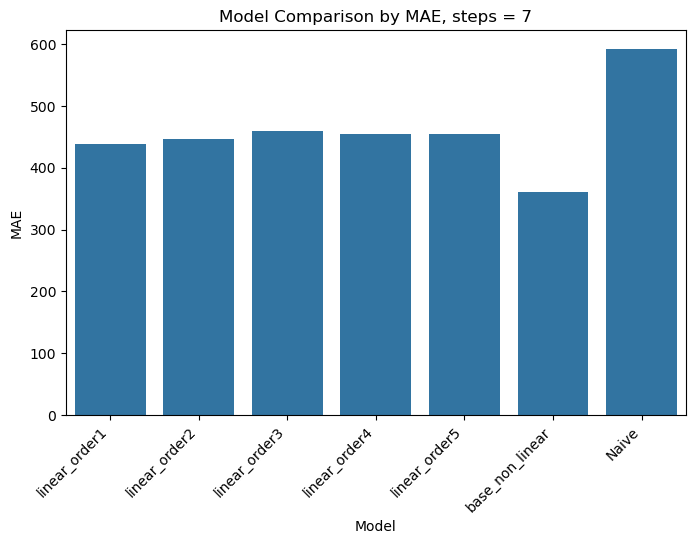

MAE Linear: 469.41 for step = 14, model = linear_order1
MAE Linear: 497.12 for step = 14, model = linear_order2
MAE Linear: 559.95 for step = 14, model = linear_order3
MAE Linear: 596.20 for step = 14, model = linear_order4
MAE Linear: 596.20 for step = 14, model = linear_order5
MAE Non Linear: 483.97 for step = 14, model = base_non_linear
Naive MAE: MAE = 537.71



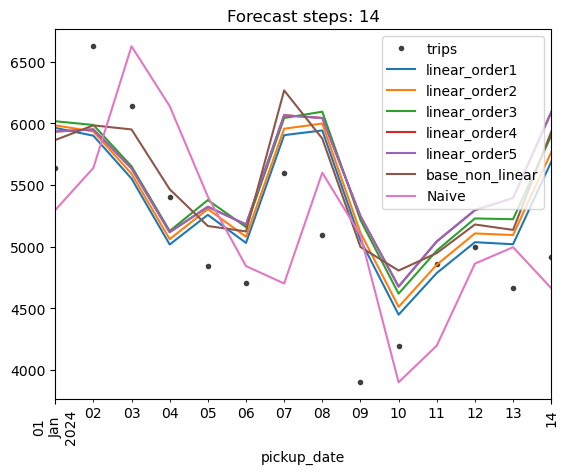

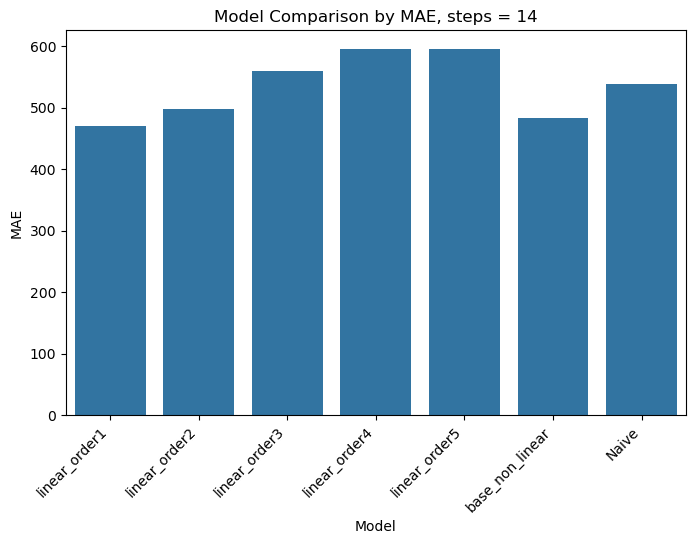

MAE Linear: 399.04 for step = 28, model = linear_order1
MAE Linear: 451.10 for step = 28, model = linear_order2
MAE Linear: 555.23 for step = 28, model = linear_order3
MAE Linear: 815.38 for step = 28, model = linear_order4
MAE Linear: 815.38 for step = 28, model = linear_order5
MAE Non Linear: 538.51 for step = 28, model = base_non_linear
Naive MAE: MAE = 543.11



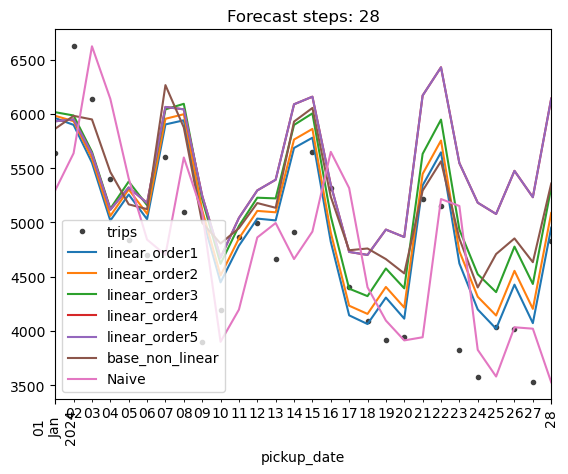

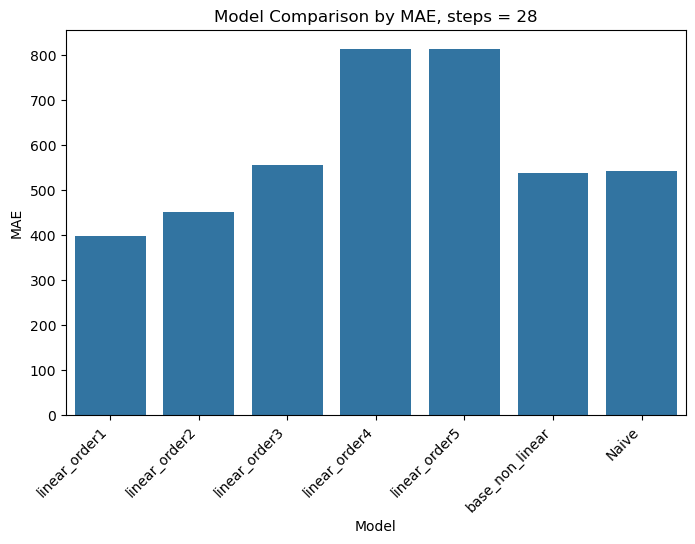

MAE Linear: 403.46 for step = 30, model = linear_order1
MAE Linear: 461.48 for step = 30, model = linear_order2
MAE Linear: 575.23 for step = 30, model = linear_order3
MAE Linear: 869.44 for step = 30, model = linear_order4
MAE Linear: 869.44 for step = 30, model = linear_order5
MAE Non Linear: 559.73 for step = 30, model = base_non_linear
Naive MAE: MAE = 545.37



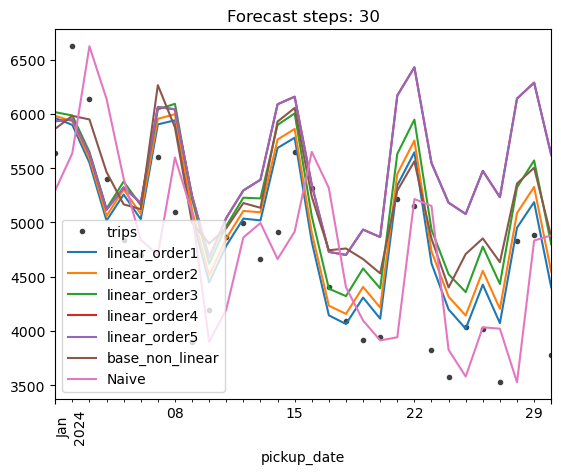

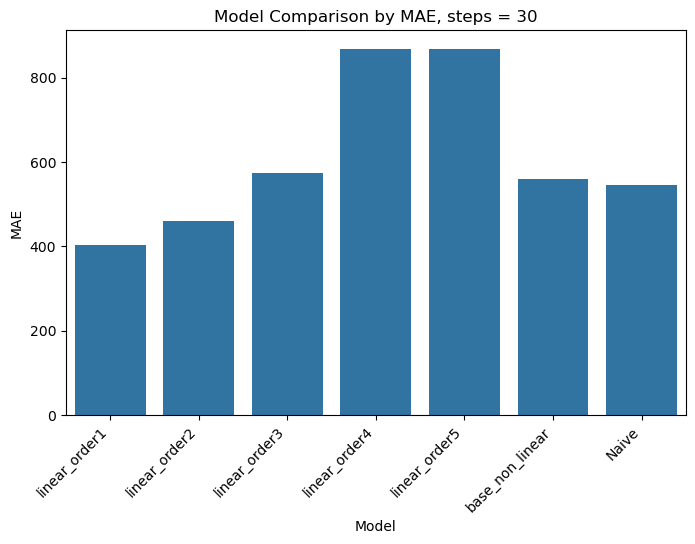

MAE Linear: 391.77 for step = 60, model = linear_order1
MAE Linear: 454.99 for step = 60, model = linear_order2
MAE Linear: 643.54 for step = 60, model = linear_order3
MAE Linear: 966.48 for step = 60, model = linear_order4
MAE Linear: 966.48 for step = 60, model = linear_order5
MAE Non Linear: 637.01 for step = 60, model = base_non_linear
Naive MAE: MAE = 541.90



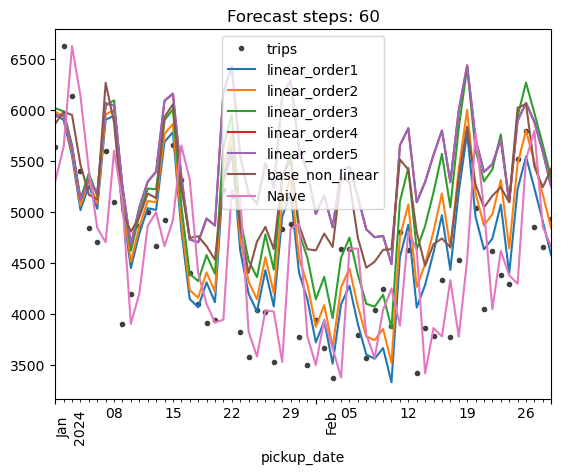

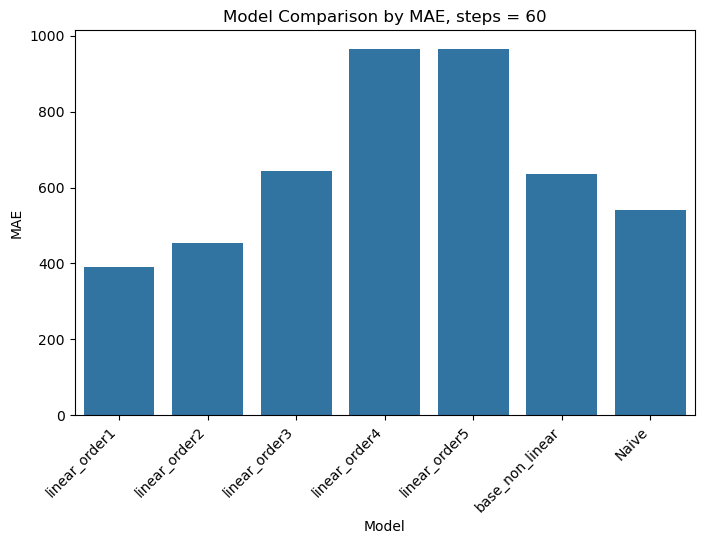

MAE Linear: 522.13 for step = 180, model = linear_order1
MAE Linear: 395.39 for step = 180, model = linear_order2
MAE Linear: 857.90 for step = 180, model = linear_order3
MAE Linear: 760.48 for step = 180, model = linear_order4
MAE Linear: 760.48 for step = 180, model = linear_order5


In [ ]:
# Run forecasts
run_forecasts(steps, daily_lags, linear_models, non_linear_models, ts_daily_train, ts_daily_test)

In the above linear_orderx is a linear model on the deterministic process + lags with weekly and yearly fourier features, where x is the order of the trend (1 linear, 2 quadratic etc). Base_non_linear is just XGBoost on deteriministic process (same fourier features) and lags. Naive is just a lag of 1, so it estimates that the current taxi count is yesterdays taxi count. 

The key observation is that although linear_order_1 performs well initally linear_order_2 is superior in the end with the best MAE of 500.2 on the longest forecast of 546 steps. Looking at the bar chart suggests that a linear trend underfits and anything above a quadratic trend overfits the data (you can seee the curves diverge from the data in the graphs above). So in future we will use a quadratic trend with our linear models. It is interesting to note that a linear trend does seem to outperfrom a quadrtatic one for lower step counts <=60 but the difference is at best 50 MAE. Whereas by a forecast of 546 quadratic trend is outperforming linear by over two fold (approx 700 MAE).

We also see that XGBoost has consitently done similar to the naive base model.

We will now look into some further improvemnts. One possible improvement would be to feed the residuals of the linear model to XGBoost to try and capture some of the more random noise in the data. 

In [ ]:
# Create models and forecasts for daily ts

# 181 days in 2025 in the data, meaning 546 is the max number of steps we can forecast

# Steps for the forecast
steps = [1, 2, 3, 7, 14, 28, 30, 60, 180, 365, 500, 546]

# Fourier features (yearly and weekly)
fourier_features = ["YE", "W"]


# Create non linear model
(X_non_linear, y_non_linear, dp_non_linear) = preprocess(daily_lags, False, 0, fourier_features, ts_daily_train)
non_linear_model = fit_non_linear(X_non_linear, y_non_linear)

non_linear_models = {
    "base_non_linear": (non_linear_model, dp_non_linear, None)
}


# Create hybrid dicts
hybrid_models = {}

# Create hybrid models
for i in [1, 2]:
    (X,y, dp_linear) = preprocess(daily_lags, True, i, fourier_features, ts_daily_train)

    # Fit XGBoost to residuals
    model = fit_linear(X,y)
    y_fit = model.predict(X)
    y_resid = y - y_fit
    
    non_linear_model = fit_non_linear(X, y_resid)
    
    
    hybrid_models[f"hybrid_order{i}"] = (fit_linear(X,y), dp_linear, non_linear_model)




In [ ]:
# Run forecasts
run_forecasts(steps, daily_lags, hybrid_models, non_linear_models, ts_daily_train, ts_daily_test)

The above shows a couple intresting things. The first is the for lower steps <= 60 the hybrid models outperform the normal linear models. For example for 7 steps hyrbid_order2 has MAE of 320.08 whereas linear_order2 has MAE of 446.66. For 30 steps hybrid_order2 has MAE of 346.06 compared to 461.48 of lindear_order2. For 60 steps hyrbid_order2 has MAE of 372.54 compared to 454.99 of that of linear_order2. However this trend reverses after 180 steps (when they are about equal) and gets much worse for longer forecasts. For example hybrid_order2 ends on an MAE of 785.91 compared to 500.22 of linear_order2. Visually it seems that the hybrid models are fitting to noise which is throwing some of their predictions off, you can see this in the final graph just before Oct 2024 both models have a widly low prediction for taxi counts that doens't match the data, they then both recover poorly and lie below the really trend until the end of the forecast. This is likely coming from the fact that XGBoost is potentially fitting to noise on the residuals (one idea could be that dip is a bit like the "random" dip from COVID maybe). So adding XGBoost on the residuals is causing some degree of overfitting in the long term, however in the short term it seems the forecast is better by approx 100 MAE which is significant. So possibly it may be worth considering a varied approach, using hybrid_order2 in the short term and linear_order2 in the long term.

We will come back to this later but for now we repeat the process but with the hourly data.

In [ ]:
# Create models and forecasts for hourly ts

# 181 days in 2025 in the data, meaning 13,104 is the max number of steps we can forecast

# Key step counts:
# 1 day = 24 hours
# 1 week = 168 hours
# 1 month = 720 hours (approx)
# 6 months = 4320 hours (approx)
# 1 year = 8760 hours
# 1 year + 181 days = 13104 hours

# Steps for the forecast
steps = [4, 6, 12, 24, 48, 72, 96, 120, 168, 336, 720, 4320, 8760, 13104]

# Fourier features (daily and weekly)
fourier_features = ["D", "W"]

# Create non linear model
(X_non_linear, y_non_linear, dp_non_linear) = preprocess(hourly_lags, False, 0, fourier_features, ts_hourly_train)
non_linear_model = fit_non_linear(X_non_linear, y_non_linear)

non_linear_models = {
    "base_non_linear": (non_linear_model, dp_non_linear, None)
}


# Create linear model
linear_models = {}

for i in [1, 2, 3, 4, 5]:
    (X,y, dp_linear) = preprocess(hourly_lags, True, i, fourier_features, ts_hourly_train)
    linear_models[f"linear_order{i}"] = (fit_linear(X,y), dp_linear, None)




In [ ]:
# Run forecasts
run_forecasts(steps, daily_lags, linear_models, non_linear_models, ts_daily_train, ts_daily_test)